# Tutorial 2: Linear Classification

### Imports

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Classification with Iris

We're going to use the Iris Dataset.                                              
2 flower classes (Setosa & Versicolour).                                        
2 features (length & width of sepal).                                             

In [31]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

### Visualize Data

/home/hirovi/miniconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  # Remove the CWD from sys.path while we load stuff.


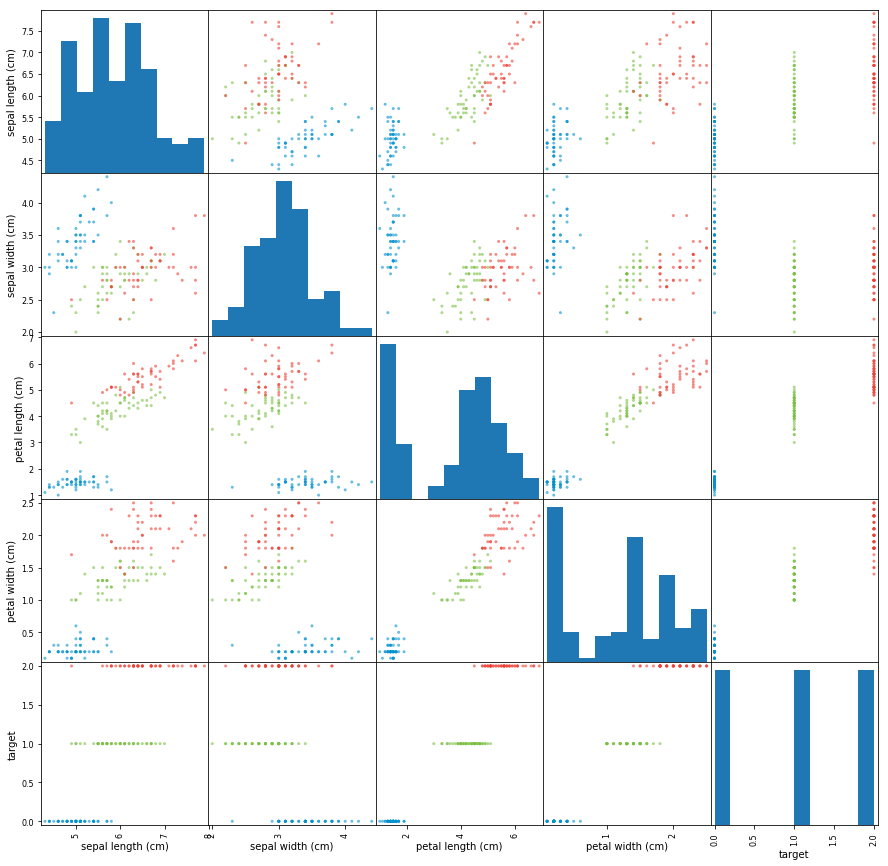

In [32]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix

iris_data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_data["target"] = iris['target']
color_wheel = {1: "#0392cf", 
               2: "#7bc043", 
               3: "#ee4035"}
colors = iris_data["target"].map(lambda x: color_wheel.get(x + 1))
ax = scatter_matrix(iris_data, color=colors, alpha=0.6, figsize=(15, 15), diagonal='hist')

In [34]:
# Select 100 samples of 2 flower classes
# Select 2 features

sepal_len = iris['data'][:100,0]
sepal_wid = iris['data'][:100,1]
labels = iris['target'][:100]

# Center data. This doesn't mean that you can
# always remove biases if you center data.
sepal_len -= np.mean(sepal_len)
sepal_wid -= np.mean(sepal_wid)

Text(0,0.5,'Sepal Width')

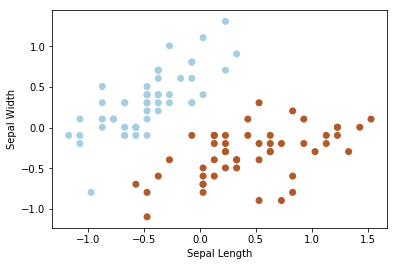

In [43]:
# Plot iris
plt.scatter(sepal_len, sepal_wid,c=labels, cmap=plt.cm.Paired)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")